# Bike Rental Prediction

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

### loading dataset

In [2]:
data =pd.read_csv('hour.csv')
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Basic checks

In [3]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
data.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [5]:
data.shape

(17379, 17)

In [6]:
data.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
data.isnull().sum() #no null values 

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
data.season.value_counts()

season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64

In [10]:
data.yr.value_counts()

yr
1    8734
0    8645
Name: count, dtype: int64

In [11]:
data.mnth.value_counts()

mnth
5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: count, dtype: int64

In [12]:
data.weekday.value_counts()

weekday
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: count, dtype: int64

In [13]:
data.workingday.value_counts()

workingday
1    11865
0     5514
Name: count, dtype: int64

In [14]:
data.weathersit.value_counts()

weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

In [15]:
data[data.duplicated()]  # no rows are duplicate

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [16]:
data.drop(['instant','casual','registered'], axis =1 , inplace = True)	 #unwanted columns

In [17]:
data

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


### EDA


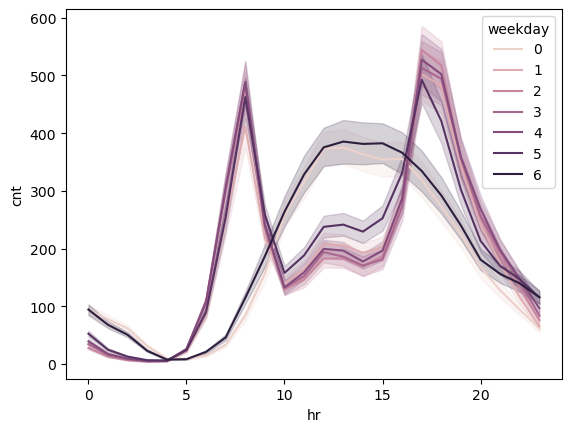

In [18]:
sns.lineplot(data=data, x='hr', y='cnt', hue='weekday')
plt.show()

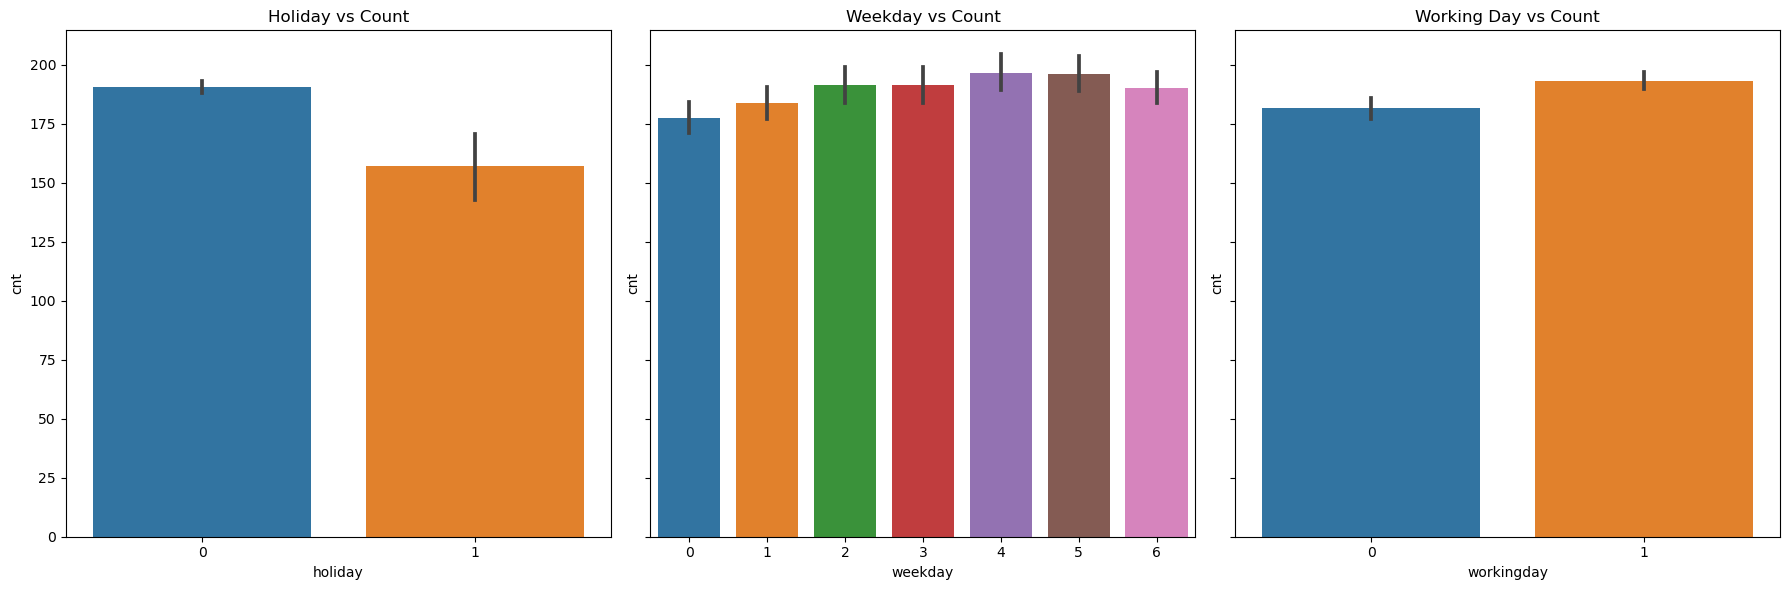

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)


sns.barplot(data=data, x='holiday', y='cnt', ax=axes[0])
axes[0].set_title('Holiday vs Count')


sns.barplot(data=data, x='weekday', y='cnt', ax=axes[1])
axes[1].set_title('Weekday vs Count')

sns.barplot(data=data, x='workingday', y='cnt', ax=axes[2])
axes[2].set_title('Working Day vs Count')

plt.tight_layout()
plt.show()



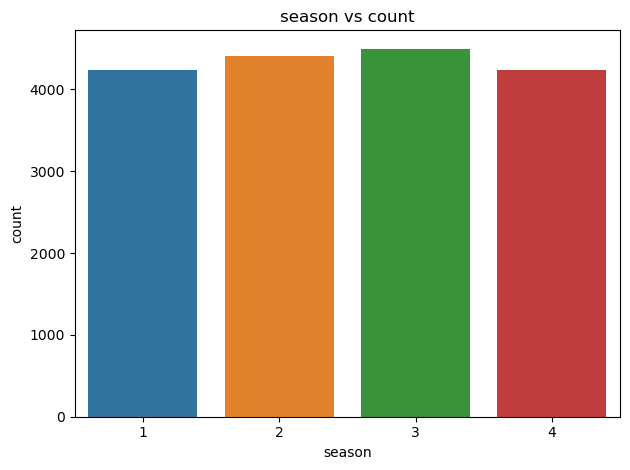

In [20]:
sns.countplot(data=data, x='season')
plt.title('season vs count')

plt.tight_layout()
plt.show()


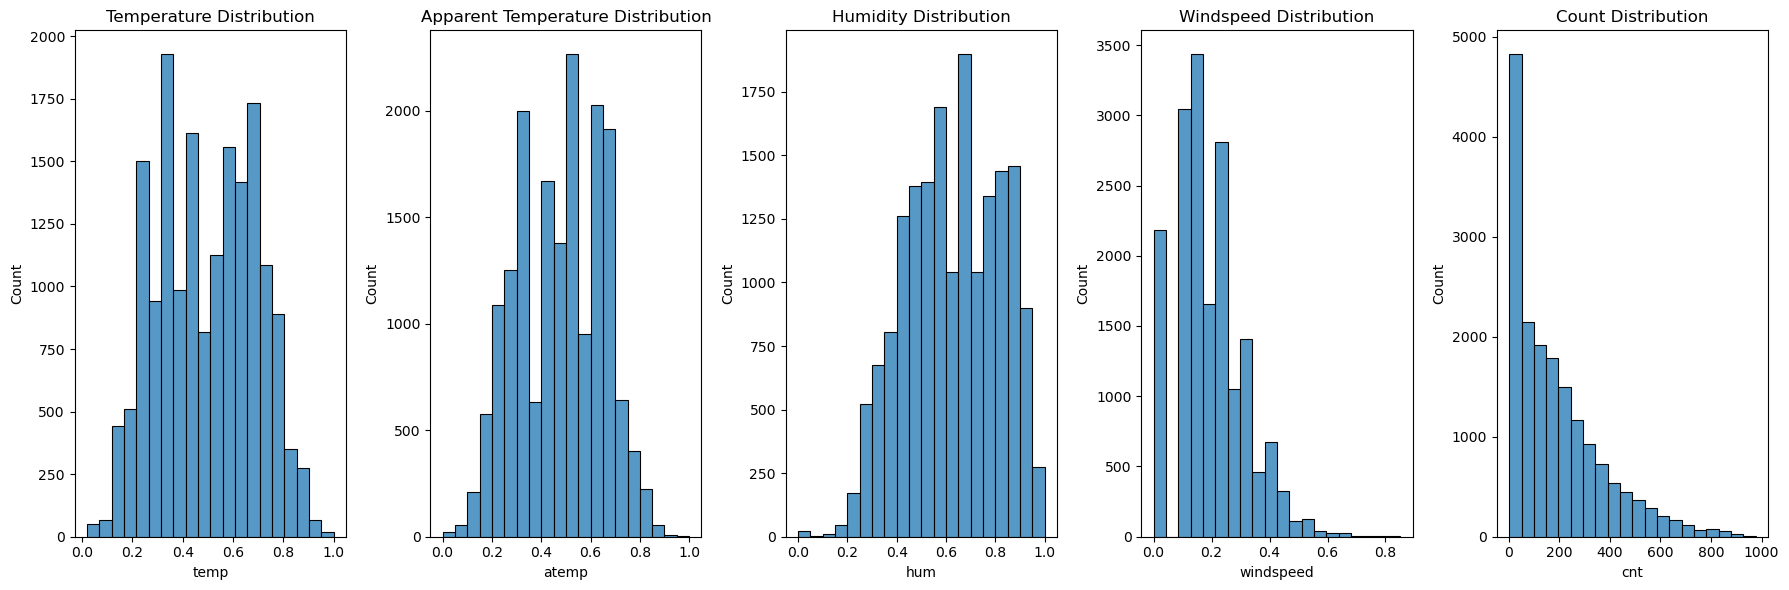

In [22]:
fig, axes = plt.subplots(1, 5, figsize=(18, 6))

sns.histplot(data['temp'], bins = 20, ax = axes[0])
axes[0].set_title('Temperature Distribution')

sns.histplot(data['atemp'], bins = 20, ax = axes[1])
axes[1].set_title('Apparent Temperature Distribution')

sns.histplot(data['hum'], bins = 20, ax = axes[2])
axes[2].set_title('Humidity Distribution')

sns.histplot(data['windspeed'], bins = 20, ax = axes[3])
axes[3].set_title('Windspeed Distribution')

sns.histplot(data['cnt'], bins = 20, ax = axes[4])
axes[4].set_title('Count Distribution')

plt.tight_layout()
plt.show()

<Figure size 1200x900 with 0 Axes>

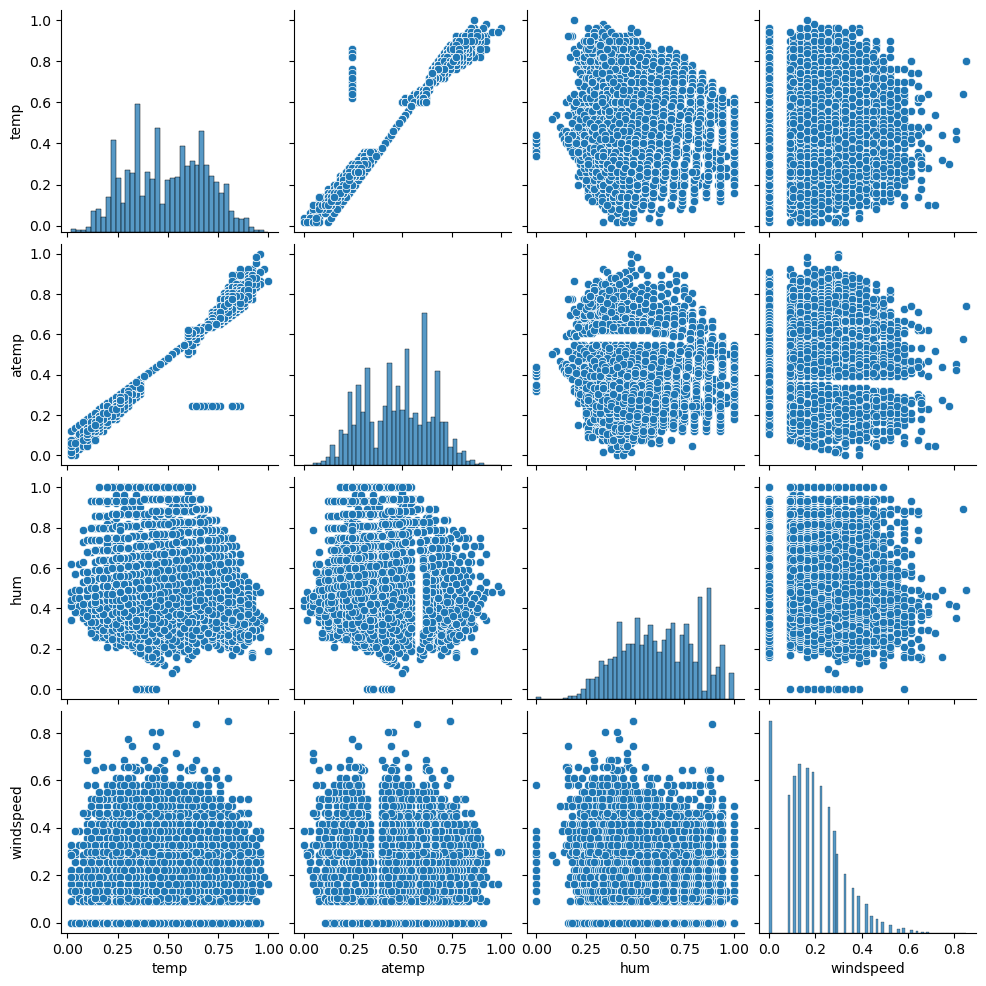

<Figure size 1200x900 with 0 Axes>

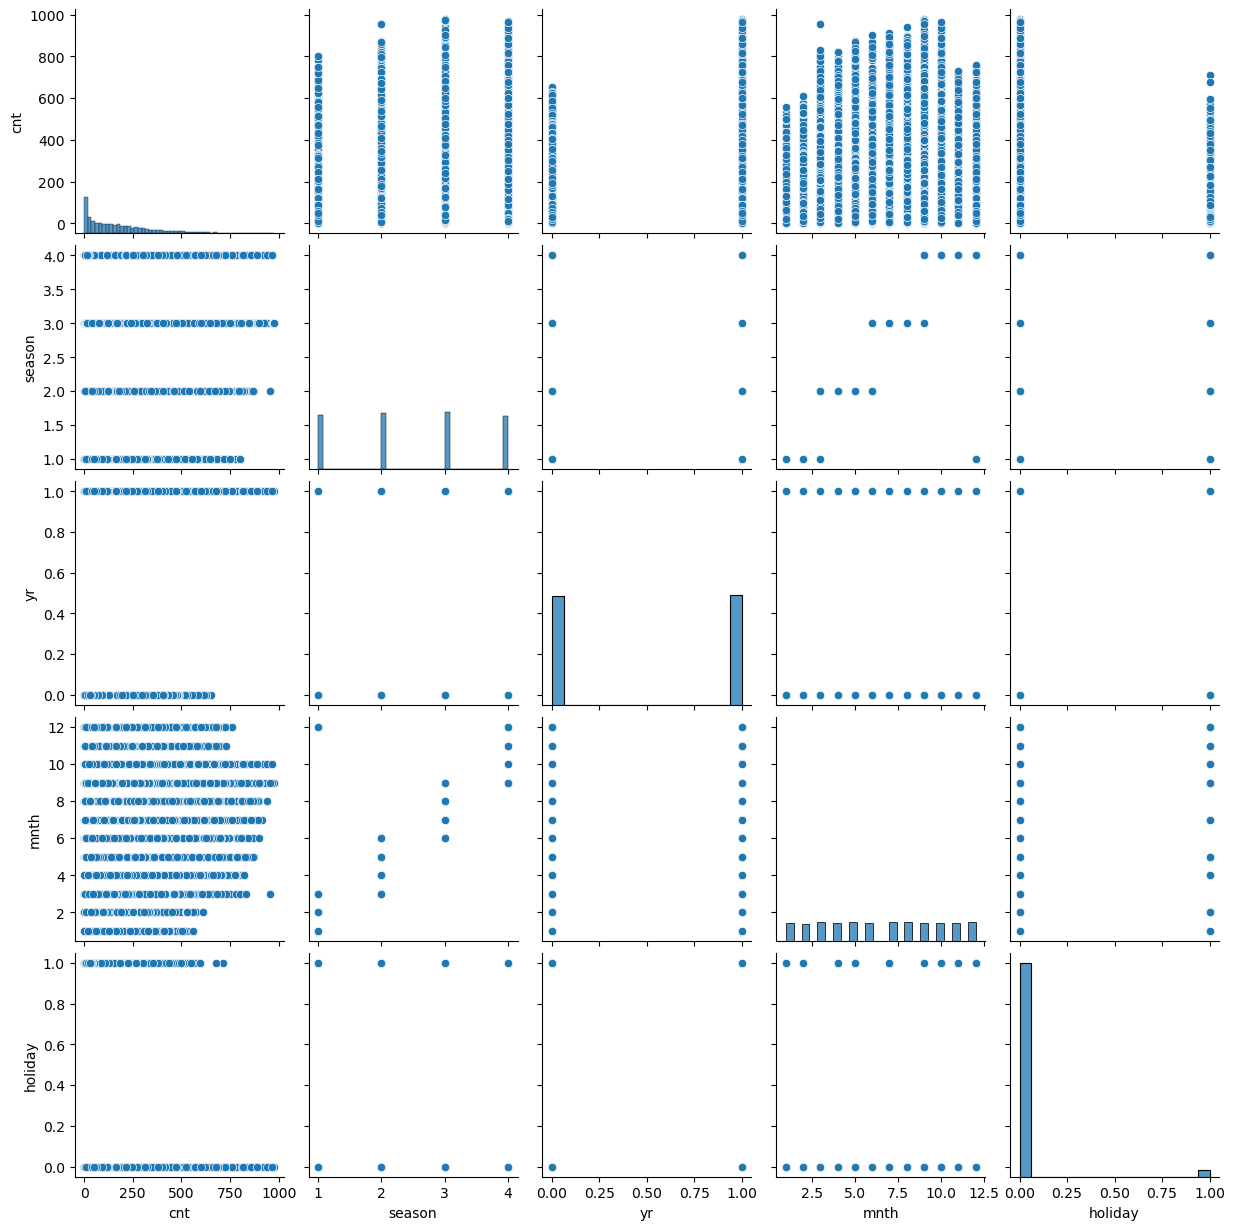

In [23]:
group1 = ['temp', 'atemp', 'hum', 'windspeed']
group2 = ['cnt', 'season', 'yr', 'mnth', 'holiday']

plt.figure(figsize=(12, 9))
sns.pairplot(data[group1])
plt.show()

plt.figure(figsize=(12, 9))
sns.pairplot(data[group2])
plt.show()

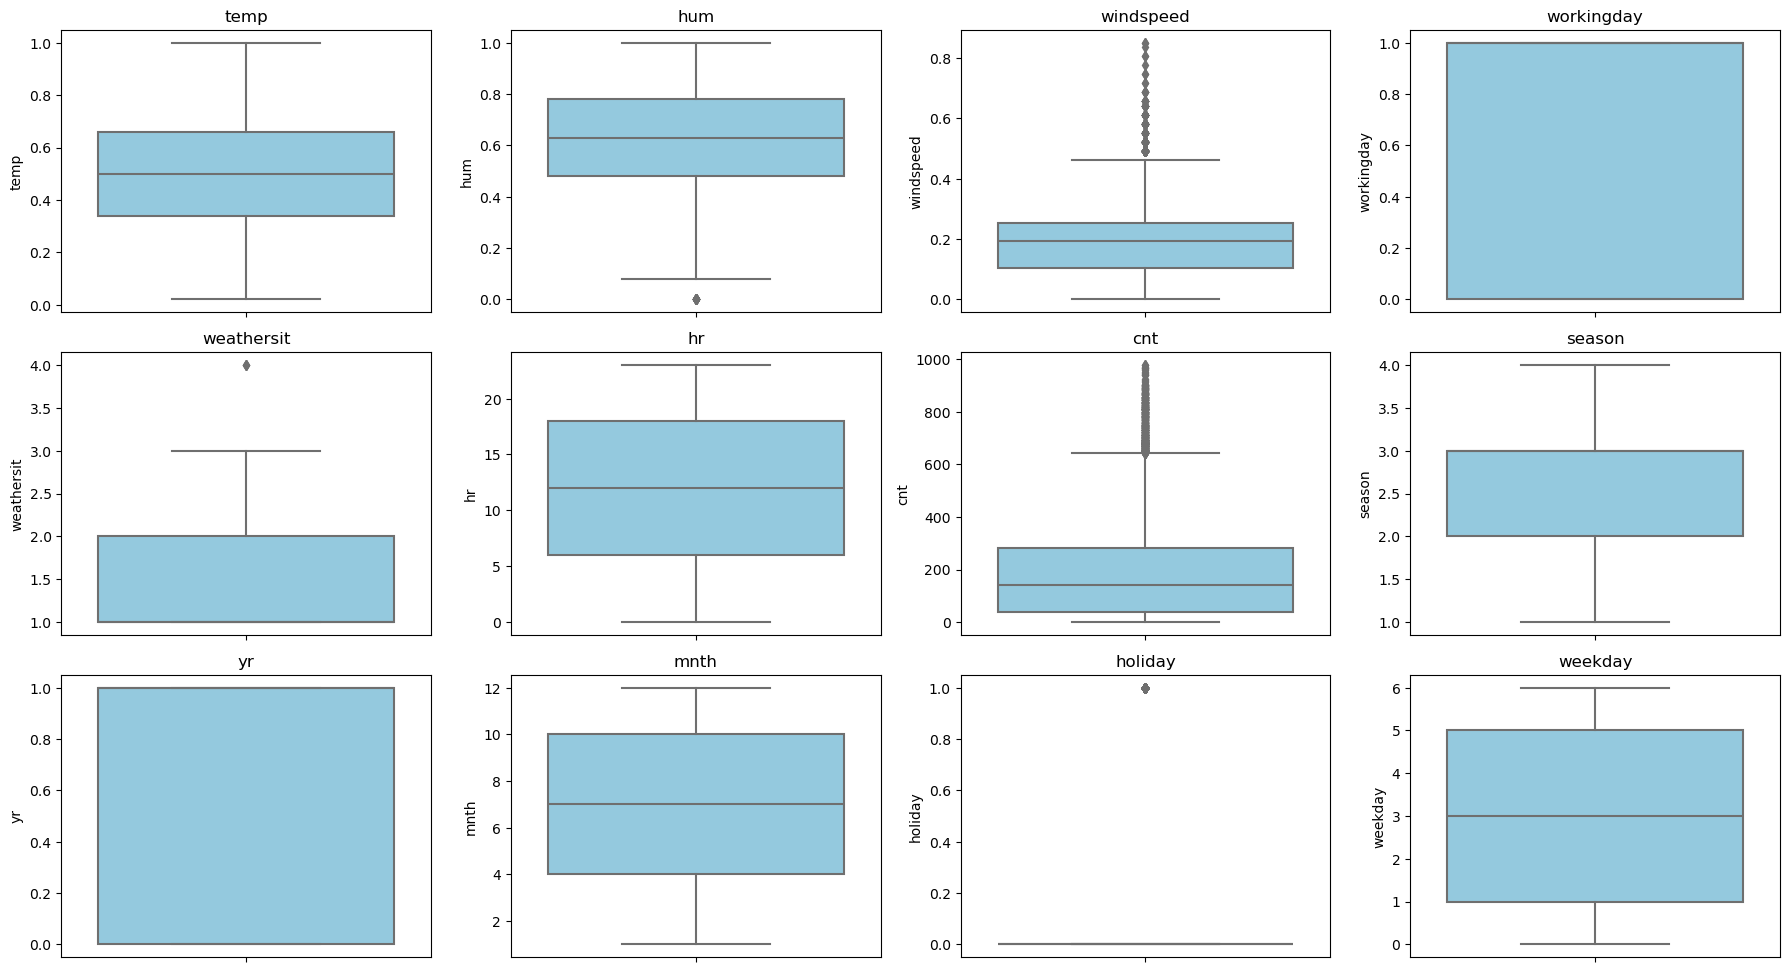

In [24]:
columns_to_plot = ['temp', 'hum', 'windspeed','workingday','weathersit','hr',
                   'cnt', 'season', 'yr', 'mnth', 'holiday', 'weekday']

plt.figure(figsize=(18, 13))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 4, i)  
    sns.boxplot(y=data[column], color="skyblue")
    plt.title(column)
    plt.tight_layout()


plt.show()

# we are not handling outliers because we will use advance algorithms


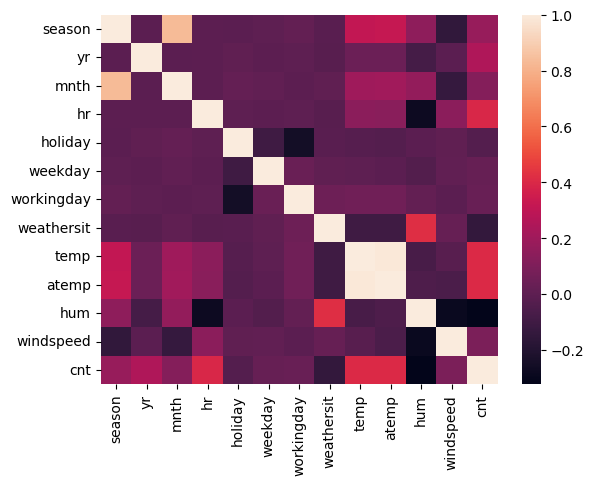

In [25]:
sns.heatmap(data.drop(['dteday'],axis =1).corr())
plt.show()

### Preprocessing


In [26]:
# droping column atemp because it is highly correlated with temp

In [27]:
data= data.drop(['atemp'],axis =1 )

### feature engineering

In [28]:
# we will extract date from dteday column
data['day']  =pd.to_datetime(data['dteday']).dt.day

In [29]:
data.drop(['dteday'],axis =1 ,inplace = True)


In [30]:
data

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,16,1
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,40,1
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,32,1
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,13,1
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.60,0.1642,119,31
17375,1,1,12,20,0,1,1,2,0.26,0.60,0.1642,89,31
17376,1,1,12,21,0,1,1,1,0.26,0.60,0.1642,90,31
17377,1,1,12,22,0,1,1,1,0.26,0.56,0.1343,61,31


### Splitting the data

In [31]:
X = data.drop(columns=['cnt'])
y = data['cnt']


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

# Predict using the trained model
y_pred_linear = linear_reg.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Print results
print(f"Linear Regression - MSE: {mse_linear}, R2: {r2_linear}")


Linear Regression - MSE: 19437.21509060314, R2: 0.38616887416760426


In [34]:
# score is low because we did not handle outliers

### Knn 

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
knn_reg = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_reg.fit(X_train, y_train)

# Predict using the trained model
y_pred_knn = knn_reg.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Print results
print(f"K-Nearest Neighbors Regressor - MSE: {mse_knn}, R2: {r2_knn}")


K-Nearest Neighbors Regressor - MSE: 4704.1766858457995, R2: 0.8514411628555152


### SVR

In [36]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
svr_reg = SVR(kernel='rbf')

# Train the model
svr_reg.fit(X_train, y_train)

# Predict using the trained model
y_pred_svr = svr_reg.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print results
print(f"Support Vector Regressor - MSE: {mse_svr}, R2: {r2_svr}")


Support Vector Regressor - MSE: 22974.001068161928, R2: 0.27447646821780847


### decision Tree

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
decision_tree_reg = DecisionTreeRegressor(random_state=42)

# Train the model
decision_tree_reg.fit(X_train, y_train)

# Predict using the trained model
y_pred_tree = decision_tree_reg.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Print results
print(f"Decision Tree Regressor - MSE: {mse_tree}, R2: {r2_tree}")


Decision Tree Regressor - MSE: 3706.0181242807826, R2: 0.8829632091336832


### Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest_reg.fit(X_train, y_train)

# Predict using the trained model
y_pred_rf = random_forest_reg.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print(f"Random Forest Regressor - MSE: {mse_rf}, R2: {r2_rf}")


Random Forest Regressor - MSE: 1754.8331871116222, R2: 0.9445820182638441


### Gradient Boosting

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
gradient_boosting_reg = GradientBoostingRegressor(random_state=42)

# Train the model
gradient_boosting_reg.fit(X_train, y_train)

# Predict using the trained model
y_pred_gb = gradient_boosting_reg.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print results
print(f"Gradient Boosting Regressor - MSE: {mse_gb}, R2: {r2_gb}")


Gradient Boosting Regressor - MSE: 4744.408255859224, R2: 0.8501706418575105


### XG Boosting

In [40]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
xgb_reg = XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgb_reg.fit(X_train, y_train)

# Predict using the trained model
y_pred_xgb = xgb_reg.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print results
print(f"XGBoost Regressor - MSE: {mse_xgb}, R2: {r2_xgb}")


XGBoost Regressor - MSE: 1611.8056640625, R2: 0.9490988850593567


# Results

 ### XG Boost is giving high score near to 0.95 and with least mean sqaured error 

In [41]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
xgb_reg = XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgb_reg.fit(X_train, y_train)

# Predict using the trained model
y_pred_xgb = xgb_reg.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print results
print(f"XGBoost Regressor - MSE: {mse_xgb}, R2: {r2_xgb}")

XGBoost Regressor - MSE: 1611.8056640625, R2: 0.9490988850593567


# Model Comparision Report

To evaluate the performance of multiple classification models on the bike rental prediction dataset, we will first focus on predicting the cnt (daily bike rental count) using the available features like season, day, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, hum, and windspeed. Since cnt is a regression target (numeric value), we will use regression models.

steps invloved, 

Loaded Dataset: You imported the dataset and inspected it for any issues.

Basic Checks: Performed basic checks such as checking for missing values, data types, and the general structure of the data.

Dropped Unnecessary Columns: Removed irrelevant or redundant columns that wouldn't contribute to the model.

Exploratory Data Analysis (EDA): Conducted EDA to understand the distribution of data and relationships between features and target variables.
Removed Highly Correlated Columns: Dropped columns that were highly correlated to avoid multicollinearity, which could negatively impact model performance.

Feature Engineering: Extracted additional features, such as the day from the date column, to enhance the model's predictive power.

Data Preparation:
The dataset is split into features (X) and target (y), where the target is the cnt column (bike rental count).
The data is split into training and testing sets using train_test_split().

Define Models:
We use multiple regression models: Linear Regression, Ridge Regression, Lasso Regression, Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor, Support Vector Regressor, K-Nearest Neighbors Regressor, and XGBoost Regressor.

Evaluate Models:
For each model, we calculate MSE (Mean Squared Error), R2 (R-squared), and MAE (Mean Absolute Error) to evaluate the model’s performance on the test data.


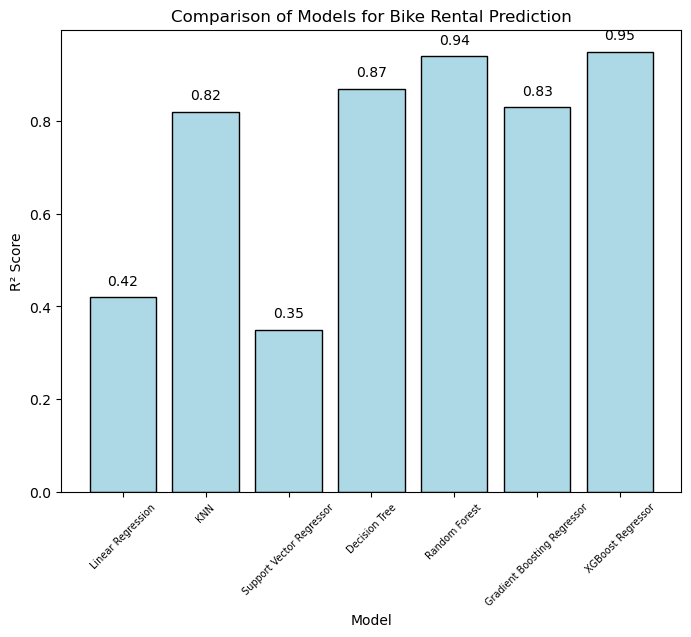

In [42]:
AllScoreOfTheModel = {
    'Linear Regression':0.42,
    'KNN': 0.82,    
    'Support Vector Regressor': 0.35,  
    'Decision Tree': 0.87,  
    'Random Forest': 0.94,  
    'Gradient Boosting Regressor': 0.83,  
    'XGBoost Regressor': 0.95 
}

keys = AllScoreOfTheModel.keys()
values = AllScoreOfTheModel.values()

# Create bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(keys, values, color='lightblue', edgecolor='black')  

plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('Comparison of Models for Bike Rental Prediction')
plt.xticks(rotation=45, fontsize=7)

# Annotate each bar with its score
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.02, f'{value:.2f}', ha='center', va='bottom')

plt.show()

# Report on Challenges faced

Feature Engineering: While extracting meaningful features like the "day" from the date column was useful, ensuring that the feature engineering process didn't introduce unnecessary complexity or redundancy was a challenge.

Feature Selection: Dropping highly correlated features was essential to prevent overfitting.

Choosing the Right Models: Selecting the appropriate models for regression was challenging, especially when deciding between simpler models like Linear Regression and more complex ones like XGBoost or Random Forest.
